### EDA of Student Scores Data


In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Load the dataset
df = pd.read_csv('scores_data.csv')

In [26]:
# Display first 5 rows
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [27]:
# Display last 5 rows
df.tail()

,Batch,User_ID,Score
144,AI_ELITE_4,uid_5,4 / 7
145,AI_ELITE_4,uid_4,4 / 7
146,AI_ELITE_4,uid_3,4 / 7
147,AI_ELITE_4,uid_2,3 / 7
148,AI_ELITE_4,uid_1,2 / 7


In [28]:
# check for column data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [29]:

df.describe()

,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


In [31]:
# checking null values
df.isnull().sum()

,0
Batch,0
User_ID,0
Score,0


In [32]:
# checking for duplicates

df.duplicated().sum()

np.int64(0)

In [34]:
# checking column names
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

In [38]:
# Remove leading/trailing whitespace
df.columns = df.columns.str.strip()

In [39]:
# Convert 'Score' from string to float
df['Score_Num'] = df['Score'].str.split('/').str[0].astype(int)

In [40]:
# Get mean, min, max, count, std
df['Score_Num'].describe()

,Score_Num
count,149.000000
mean,4.382550
std,1.592199
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,7.000000


In [41]:
df.head()

,Batch,User_ID,Score,Score_Num
0,AI_ELITE_7,uid_149,6 / 7,6
1,AI_ELITE_7,uid_148,6 / 7,6
2,AI_ELITE_7,uid_147,7 / 7,7
3,AI_ELITE_7,uid_146,7 / 7,7
4,AI_ELITE_7,uid_145,4 / 7,4


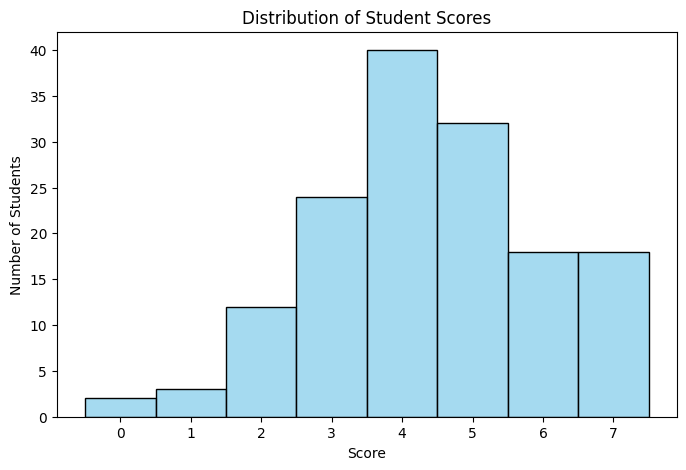

In [42]:
# histogram for frequency distribution of scores
plt.figure(figsize=(8, 5))
sns.histplot(df['Score_Num'], bins=8, discrete=True, color='skyblue')
plt.title('Distribution of Student Scores')
plt.xlabel('Score')
plt.ylabel('Number of Students')
plt.show()

/tmp/ipython-input-1552714878.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Batch', palette='viridis', order=df['Batch'].value_counts().index)


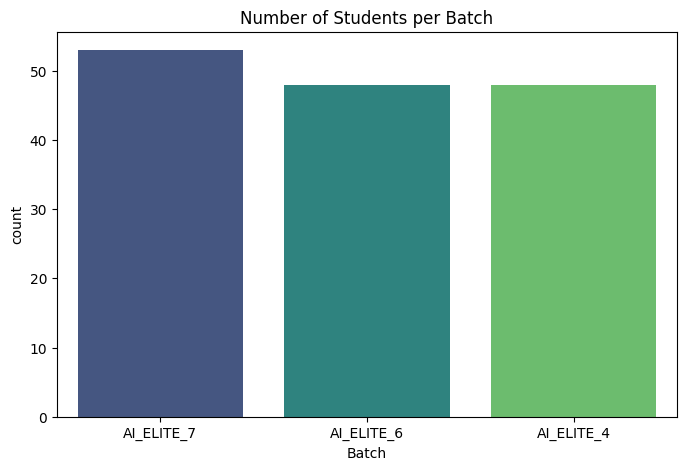

In [43]:
# Bar chart for count of students in each batch
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Batch', palette='viridis', order=df['Batch'].value_counts().index)
plt.title('Number of Students per Batch')
plt.show()

/tmp/ipython-input-2133323381.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Batch', y='Score_Num', palette='pastel')


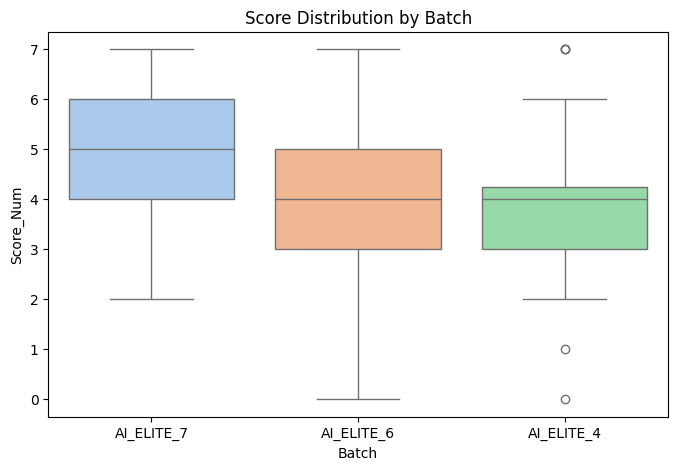

In [44]:
# Boxplot to compare the median and spread of scores across different batches
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Batch', y='Score_Num', palette='pastel')
plt.title('Score Distribution by Batch')
plt.show()

/tmp/ipython-input-3757025009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=batch_avg, x='Batch', y='Score_Num', palette='magma')


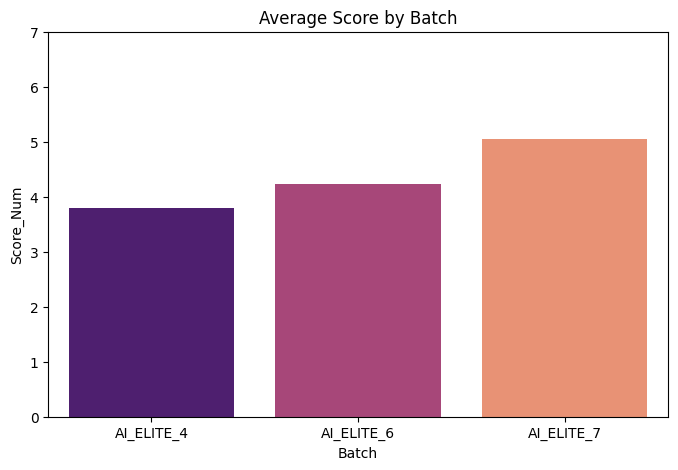

In [45]:
# bar chart for average score per batch
batch_avg = df.groupby('Batch')['Score_Num'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=batch_avg, x='Batch', y='Score_Num', palette='magma')
plt.title('Average Score by Batch')
plt.ylim(0, 7) # Max score is 7
plt.show()

## 1. Univariate Analysis

    composition of students across different batches

/tmp/ipython-input-1941318869.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Batch', palette='viridis', order=df['Batch'].value_counts().index)


Text(0, 0.5, 'Count')

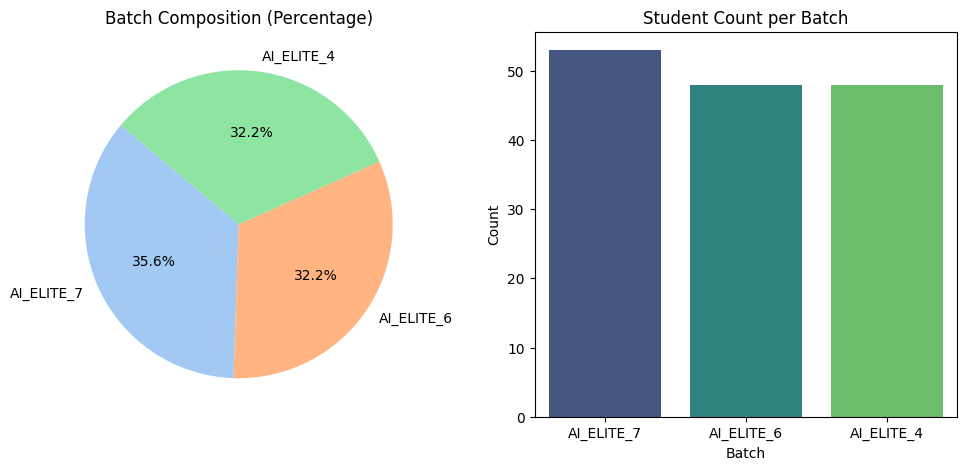

In [48]:
# Categorical Univariate Analysis: Batch
plt.figure(figsize=(12, 5))

# Pie Chart for Proportions
plt.subplot(1, 2, 1)
batch_counts = df['Batch'].value_counts()
plt.pie(batch_counts, labels=batch_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Batch Composition (Percentage)')

# Count Plot for Frequency
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Batch', palette='viridis', order=df['Batch'].value_counts().index)
plt.title('Student Count per Batch')
plt.ylabel('Count')

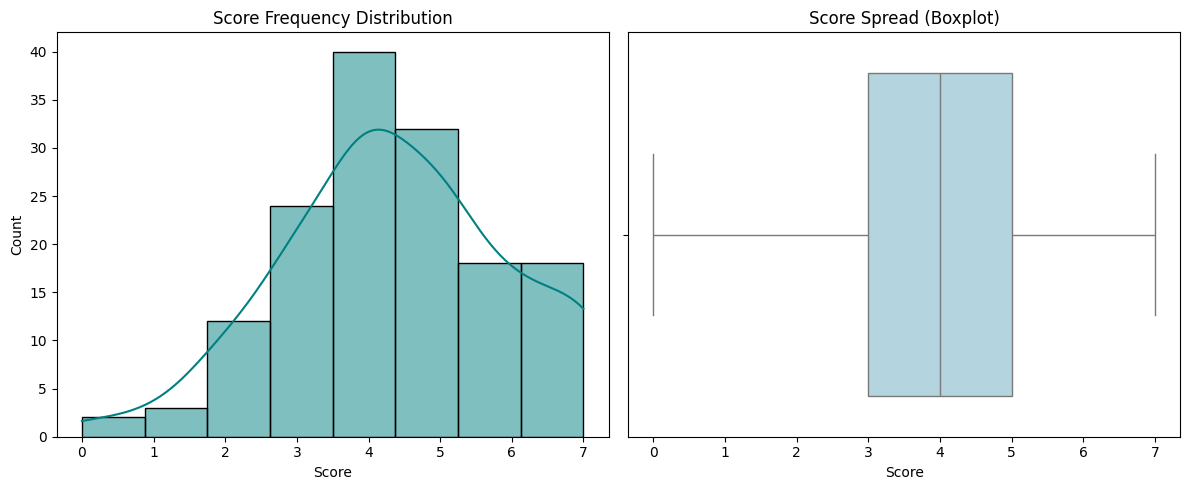

In [49]:
# Numerical Univariate Analysis: Score
plt.figure(figsize=(12, 5))

# Histogram with KDE (Kernel Density Estimate)
plt.subplot(1, 2, 1)
sns.histplot(df['Score_Num'], kde=True, bins=8, color='teal')
plt.title('Score Frequency Distribution')
plt.xlabel('Score')

# Boxplot for detecting outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Score_Num'], color='lightblue')
plt.title('Score Spread (Boxplot)')
plt.xlabel('Score')

plt.tight_layout()
plt.show()

## 2. Bivariate Analysis


relationship between Batch (Categorical) and  Score (Numerical)

/tmp/ipython-input-2073117791.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Batch', y='Score_Num', palette='muted', inner="quartile")


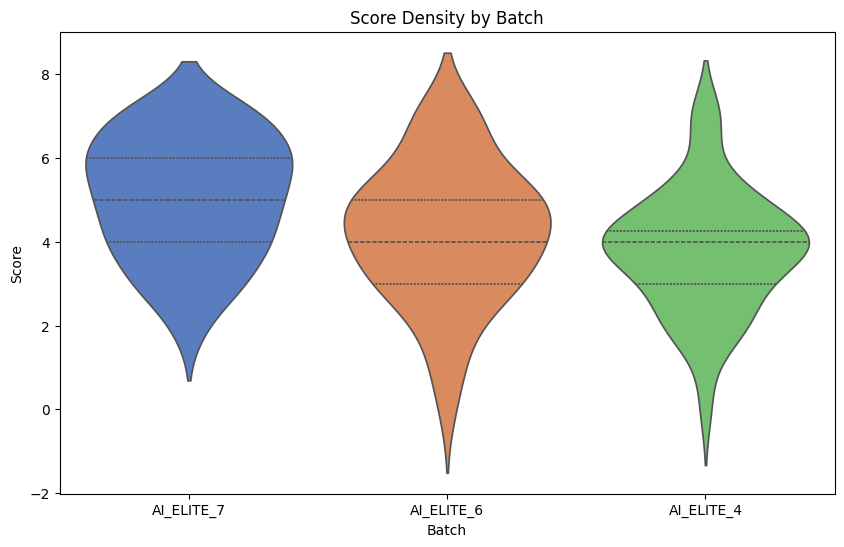

In [50]:
# Violin Plot: Combines boxplot and kernel density plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Batch', y='Score_Num', palette='muted', inner="quartile")
plt.title('Score Density by Batch')
plt.xlabel('Batch')
plt.ylabel('Score')
plt.show()

/tmp/ipython-input-2714279528.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Batch', y='Score_Num', palette='magma', errorbar='sd')


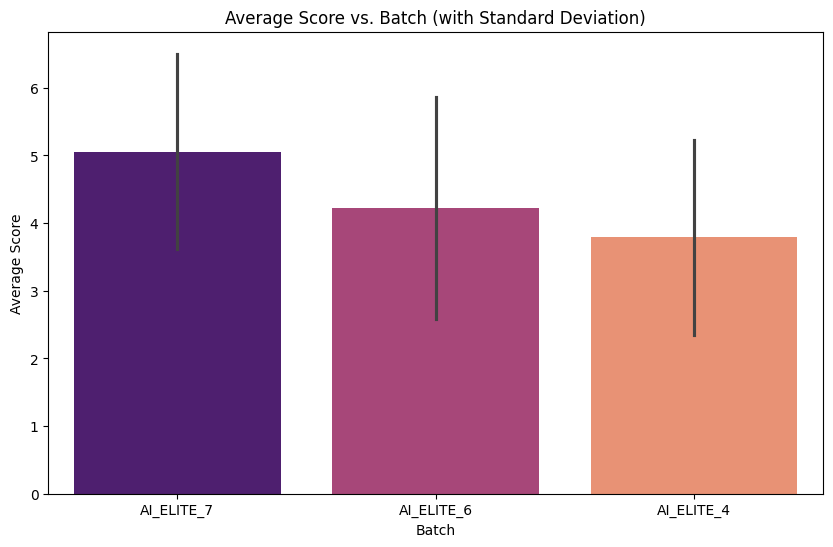

In [51]:
# Bar Plot with Standard Deviation error bars
plt.figure(figsize=(10, 6))
# errorbar='sd' draws the standard deviation on the bar
sns.barplot(data=df, x='Batch', y='Score_Num', palette='magma', errorbar='sd')
plt.title('Average Score vs. Batch (with Standard Deviation)')
plt.ylabel('Average Score')
plt.xlabel('Batch')
plt.show()

In [52]:
# Basic info
print(f"Total Students: {len(df)}")
print(f"Overall Class Average: {df['Score_Num'].mean():.2f} / 7")
print(f"Students with Full Marks (7/7): {len(df[df['Score_Num'] == 7])}")

Total Students: 149
Overall Class Average: 4.38 / 7
Students with Full Marks (7/7): 18


In [53]:
# Create a simple category: 'Pass' or 'Needs Improvement'
df['Status'] = df['Score_Num'].apply(lambda x: 'Pass' if x >= 4 else 'Needs Improvement')

# See the counts
print(df['Status'].value_counts())

Status
Pass                 108
Needs Improvement     41
Name: count, dtype: int64


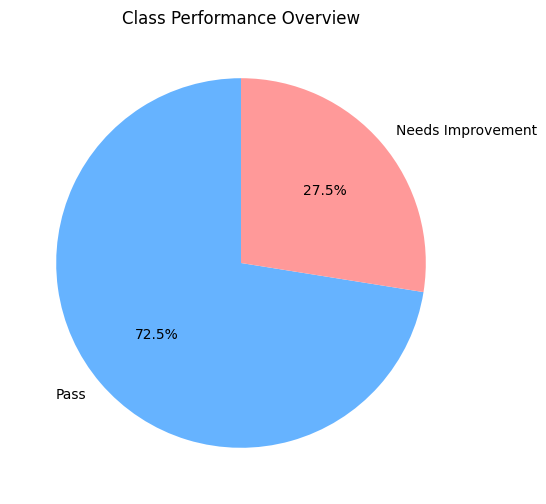

In [54]:
# Pie chart for proportion of passing students
status_counts = df['Status'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=90)
plt.title('Class Performance Overview')
plt.show()

/tmp/ipython-input-4166032058.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Score_Num'], palette='Blues_d')


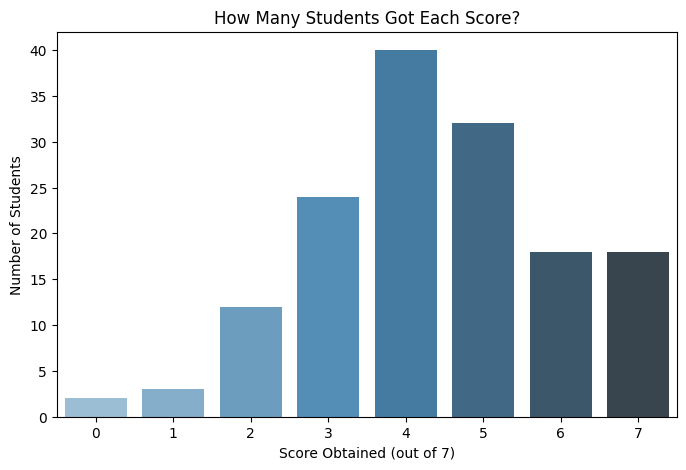

In [56]:
# count plot for each specific score
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Score_Num'], palette='Blues_d')
plt.title('How Many Students Got Each Score?')
plt.xlabel('Score Obtained (out of 7)')
plt.ylabel('Number of Students')
plt.show()